In [1]:
%load_ext autoreload
%matplotlib widget
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tqdm.autonotebook import trange, tqdm
from keras.datasets import mnist
from PIL import Image, ImageOps

%autoreload 1
%aimport jsi

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-06-13 16:09:56.509783: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-13 16:09:56.654216: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-13 16:09:57.232731: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_977005/2918228763.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange, tqdm
2024-06-

Num GPUs Available:  1


2024-06-13 16:09:58.441207: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-13 16:09:58.441251: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [4]:
# preset patterns
mask = {
    's': np.array(
        [[0, 0, 0, 0, 0, 0, 0], 
        [0, 1, 1, 0, 0, 1, 0], 
        [1, 0, 0, 1, 0, 0, 1], 
        [1, 0, 0, 1, 0, 0, 1], 
        [1, 0, 0, 1, 0, 0, 1], 
        [0, 1, 0, 0, 1, 1, 0], 
        [0, 0, 0, 0, 0, 0, 0]]
    ), 
    't': np.array(
        [[0, 0, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0, 0], 
        [1, 1, 1, 1, 1, 1, 1], 
        [1, 0, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0, 0], 
        [0, 0, 0, 0, 0, 0, 0]]
    ), 
    'e': np.array(
        [[0, 0, 0, 0, 0, 0, 0], 
        [1, 1, 1, 1, 1, 1, 1], 
        [1, 0, 0, 1, 0, 0, 1], 
        [1, 0, 0, 1, 0, 0, 1], 
        [1, 0, 0, 0, 0, 0, 1], 
        [1, 0, 0, 0, 0, 0, 1], 
        [0, 0, 0, 0, 0, 0, 0]]
    ), 
    'v': np.array(
        [[0, 0, 0, 0, 0, 0, 0], 
        [1, 1, 1, 1, 1, 0, 0], 
        [0, 0, 0, 0, 0, 1, 0], 
        [0, 0, 0, 0, 0, 0, 1], 
        [0, 0, 0, 0, 0, 1, 0], 
        [1, 1, 1, 1, 1, 0, 0], 
        [0, 0, 0, 0, 0, 0, 0]]
    ), 
    'n': np.array(
        [[0, 0, 0, 0, 0, 0, 0], 
        [1, 1, 1, 1, 1, 1, 1], 
        [0, 0, 1, 0, 0, 0, 0], 
        [0, 0, 0, 1, 0, 0, 0], 
        [0, 0, 0, 0, 1, 0, 0], 
        [1, 1, 1, 1, 1, 1, 1], 
        [0, 0, 0, 0, 0, 0, 0]]
    )
}

duck = np.asarray(imageio.imread('./duck_pix.png'))[:, :, 3] / 255

/tmp/ipykernel_40674/2471156245.py:50: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  duck = np.asarray(imageio.imread('./duck_pix.png'))[:, :, 3] / 255


/tmp/ipykernel_178837/595368896.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  duck = np.asarray(imageio.imread('./duck_pix.png'))[:, :, 3] / 255


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.053634822
[[0.000 + 0.000i 0.000 + -0.000i 0.000 + 0.000i ... 0.000 + 0.000i
  0.000 + 0.000i 0.000 + -0.000i]
 [0.000 + 0.000i 0.000 + 0.000i 0.000 + 0.000i ... 0.000 + 0.000i
  0.000 + 0.000i 0.000 + 0.000i]
 [0.000 + 0.000i 0.000 + -0.000i 0.000 + -0.000i ... 0.000 + 0.000i
  0.000 + -0.000i 0.000 + -0.000i]
 ...
 [0.000 + -0.000i 0.000 + -0.000i 0.000 + -0.000i ... 0.000 + 0.000i
  0.000 + 0.000i 0.000 + 0.000i]
 [0.000 + -0.000i 0.000 + 0.000i 0.000 + 0.000i ... 0.000 + -0.000i
  0.000 + 0.000i 0.000 + -0.000i]
 [0.000 + 0.000i 0.000 + 0.000i 0.000 + 0.000i ... 0.000 + 0.000i
  0.000 + -0.000i 0.000 + -0.000i]]


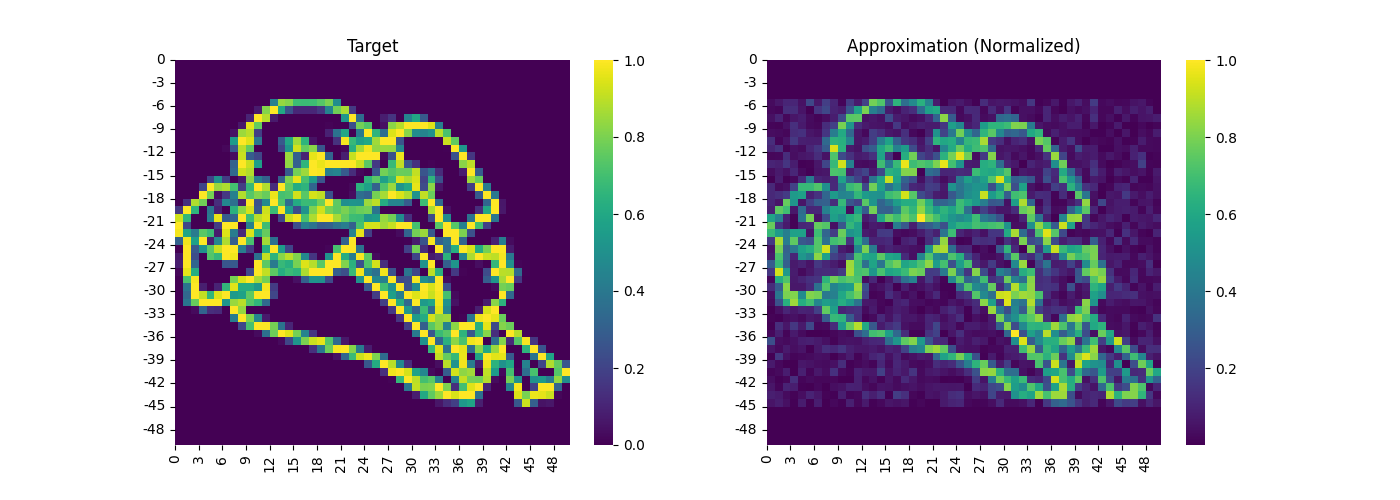

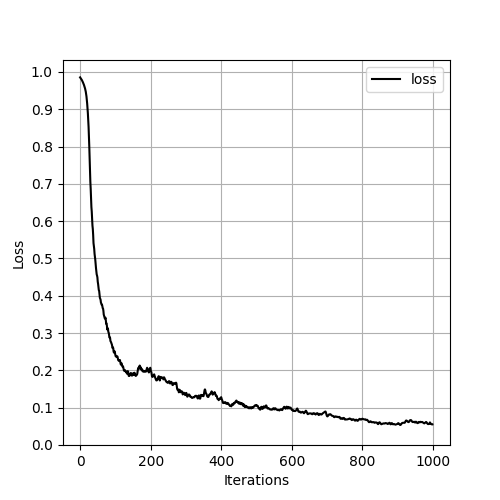

In [78]:
# JSI Approximation

np.set_printoptions(formatter={'complexfloat': lambda x: "{0.real:0.3f} + {0.imag:0.3f}i".format(x)})

duck = np.asarray(imageio.imread('./duck_pix.png'))[:, :, 3] / 255
nodes = 50
# padding = 50 #0.06560147
# padding = 5 # 0.14005375
padding = 50 # 0.21368206
# target = np.random.uniform(0, 1, (nodes, nodes)) #* np.exp(2j * np.pi * np.random.uniform(0, 1, (nodes, nodes))))
# target = np.abs(np.random.normal(0, 1, (nodes, nodes)))
# target = jsi.jsi(nodes, js, phis, js_nh, phis_nh, g, y_0, y_ex, 0, 0, 0, 0)
# target = np.transpose(mask['s'])
target = duck
input = {
        'nodes' : nodes,
        'padding' : padding,
        'n_rings': 5,
        'target' : target,
        'orth_itr' : 10
        }
pred, loss, output = jsi.jsi_backprop(input, EPOCHS=1e3)#3e-5)
# print(pred)
print(pred['loss'].numpy())
print(output)
try:
    plt.close(fig1)
    # plt.close(fig2)
    plt.close(fig3)
except:
    pass

fig1 = jsi.pltCtst(target, output, 0, 0, nodes, nodes)
# fig2 = jsi.pltSect(output, 0, 0, nodes, nodes)
# fig2 = jsi.data2HM(pred)

fig3, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=100)
ax.plot(range(len(loss)), loss, label='loss', color='black')
ax.legend(loc='best')
ax.set_xlabel("Iterations")
ax.set_ylabel("Loss")
ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.grid()

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


  0%|          | 0/60 [00:00<?, ?it/s]

iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14498544


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.095471025


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1302306


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.032404125


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.030900598


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18711168


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10418129


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07215911


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3279341


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.062454164


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14153486


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16651976


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18143618


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.057872415


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09249318


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14227164


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09896928


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06998479


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.26200092


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.039690793


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.26992363


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.111287415


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14471835


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.05895585


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.075966895


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14598495


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13507318


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10209185


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.22163993


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18390924


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08333892


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06300622


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.049731195


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.024446249


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06150174


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10966319


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17583108


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13062948


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.065826714


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.049336076


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.33511776


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1787749


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12512374


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1045689


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19064415


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3813613


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13277262


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1533202


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06871402


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08834165


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3192265


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.22036803


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.049949765


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.123847485


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.041279554


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.092320085


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.111965895


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09669465


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.085903704


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.032375574


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11759156


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17619032


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10976052


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07635903


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11316794


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08070183


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.070020676


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.05847925


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13800508


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08121258


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15033084


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19315475


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1126557


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.04253


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.090289116


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06523085


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.049872816


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.045283377


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.05572921


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09851968


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18038124


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11125016


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1339202


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.063458145


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.21742874


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19832057


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.24097931


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2059161


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15606612


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1904813


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.39790958


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06485492


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07989997


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08439338


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13408357


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1898275


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10488665


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10174608


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.063812494


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.44676572


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.20302379


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.106910765


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08026117


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.22252548


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.04730445


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15037745


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16923195


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13068879


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07677603


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.041250408


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12153405


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.080148995


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.067530334


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09840816


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16947556


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.017937839


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.013770878


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.054677486


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0054854155


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.021674454


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1946643


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06483859


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07195544


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07210356


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.060981393


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.089663625


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15401441


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08247715


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14405179


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.067490816


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17727268


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09889978


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1028623


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.113971055


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0968796


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16542166


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07443839


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07282865


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.092418015


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06552023


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.30026877


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13785392


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11063439


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13297373


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15918934


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14497727


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12856472


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19177604


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07814765


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.059542775


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.47847116


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.28191942


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14594412


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12303698


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16737193


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2185533


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.25979668


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.21240956


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.086100936


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08340806


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.24247879


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18306655


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15394771


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.074324965


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17959976


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13322544


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15808827


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06622583


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09661424


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13399458


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3328675


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16574526


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14976072


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12449014


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11292195


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3825196


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17227846


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16449165


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.084674954


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3826629


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.26167458


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.21279657


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09083629


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11670321


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18462032


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.27982277


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.24174476


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15239495


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1640864


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12901616


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.39239663


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07817304


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.05273944


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.03893453


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.041724622


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.20589513


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.21115643


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07816094


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16671932


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14383417


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2306053


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19970995


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.21561038


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14743817


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10616195


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12602884


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13594925


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.086530566


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.073502004


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.043118


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.24181783


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07964665


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2093293


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11800021


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07266432


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.036037624


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.03138584


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.029726326


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.03945458


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07649994


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.30165368


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.22245342


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19322729


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14007789


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08281034


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.013696194


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.013157368


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0090687275


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0035312176


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.022725344


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.34553665


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10203886


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10501903


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07932186


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.20468295


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.050561547


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.028384984


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.019438446


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.075651765


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.031250596


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.20885801


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3143263


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12949157


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1116963


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10087639


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19746423


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08801997


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08296275


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12862706


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.067937315


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.31992304


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.25443107


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.33314538


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.21804243


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.099906325


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14109528


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1211831


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.03405744


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.017672002


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.04561311


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18260795


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.21961206


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07335079


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14364856


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13579577


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.21203583


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16353911


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16830921


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.042517543


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13144523


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.22207272


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.21689248


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0973739


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06215608


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.04277599


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.5333668


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.20303166


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0860489


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.04952705


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06555277


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.26441485


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13462883


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2124489


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14174211


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09274435


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12864965


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10175419


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.05158919


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09391785


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09497279


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.32324713


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19227391


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10402942


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06457293


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06522894


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.20445794


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16543478


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14730644


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11334187


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.26312107


ValueError: x and y must have same first dimension, but have shapes (60,) and (5,)

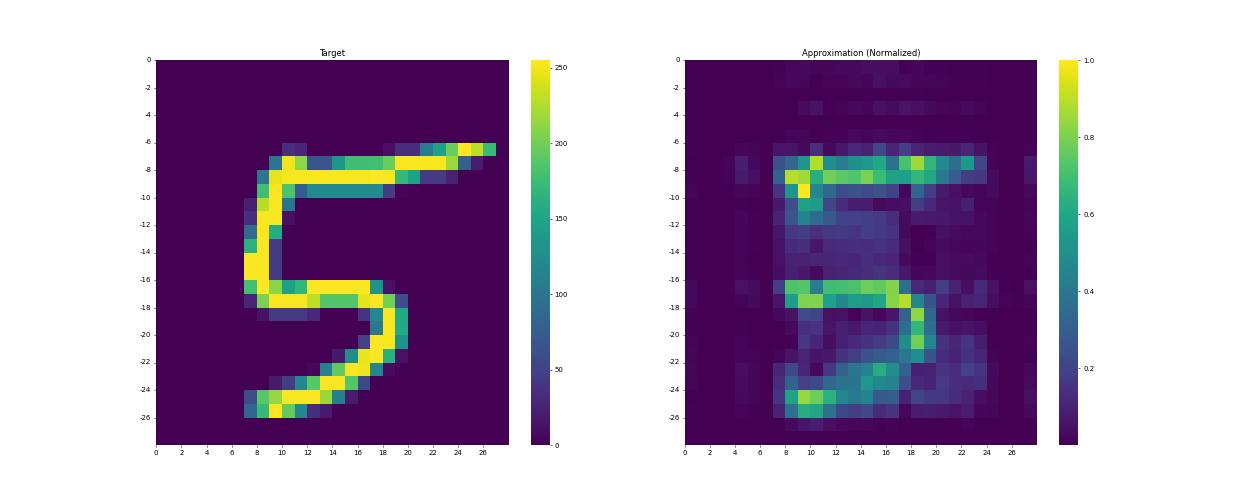

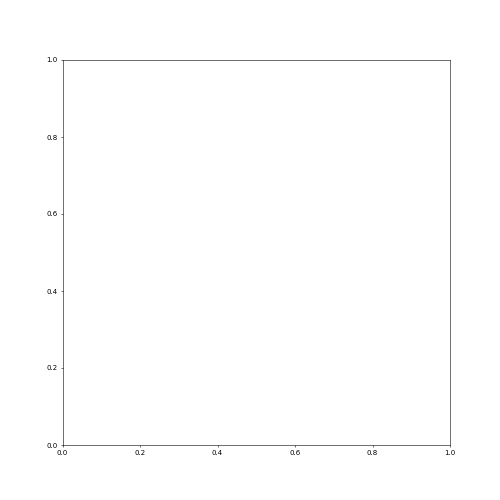

In [52]:
# JSI Approximation using MNIST dataset
np.set_printoptions(formatter={'complexfloat': lambda x: "{0.real:0.3f} + {0.imag:0.3f}i".format(x)})

from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train shape:', train_X.shape)
print('Y_train shape:', train_y.shape)
print('X_test shape:', test_X.shape)
print('Y_test shape:', test_y.shape)

loss_len = np.zeros((5, 60))
rand = int(np.floor(np.random.uniform(0, 9000)))

for i in trange(60):
    for j in range(1):
        nodes = 28
        target = train_X[i + 6413]
        input = {
                'nodes' : nodes,
                'padding' : 2,
                'n_rings': 2,
                'length': 1 if j == 0 else j * 5,
                'target' : target,
                'orth_itr' : 3
                }
        pred, loss, output = jsi.jsi_backprop(input, EPOCHS=1e3)#3e-5)
        # print(pred)
        print(loss[-1])
        loss_len[j][i] = min(loss)
        try:
            plt.close(fig)
            # plt.close(fig2)
        except:
            pass
        
        fig = jsi.pltCtst(target, output, 0, 0, nodes, nodes)
        # fig = plt.plot(range(loss.shape[0]), loss, label='loss')
        plt.savefig("./test/mnist_" + str(i) + "_pad_" + str(pred['padding']) + "_nr_" + str(pred['n_rings']) + "_l_" + str(pred['length']) + "-" + str(loss[-1]) + ".png")
        tf.keras.backend.clear_session()
        if pred.get('int', False):
            raise KeyboardInterrupt()
# try:
#     plt.close(fig3)
# except:
#     pass
# fig3, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=50)
# ax.plot(range(loss_len.shape[1]), np.average(loss_len, axis=1), label='loss')
# ax.legend(loc='best')
# ax.grid()

  0%|          | 0/60 [00:00<?, ?it/s]

iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.077569485


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.02224648


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18596709


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08389473


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14447927


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.059355974


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09285432


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07882279


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10014266


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13547873


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.22106028


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0741896


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.035320282


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.046651483


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12059718


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.054617405


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10872626


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.05817038


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.053643882


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0629372


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0727672


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07385129


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13782936


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.051914275


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.070537865


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.04400128


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.03214681


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.035266995


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11519414


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06734556


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06905544


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.01591605


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12688011


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.051617444


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.23360807


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10676801


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.045601785


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.025030315


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.20855469


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.052938998


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.30541784


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19458944


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2723478


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.05522144


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17402607


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.050055146


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.013516307


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0042696595


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09848899


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.026902199


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.083539486


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12601668


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.38720316


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.114931464


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.048562348


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0838964


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.22052032


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10288924


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.21697837


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.23322326


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14427334


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10846597


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.22326446


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2024827


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18680269


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.03960532


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15860003


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08006054


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08801663


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.04552424


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3497488


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.34202027


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.46377403


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.46377122


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.26078856


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.056973457


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07459438


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.02495122


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.29596466


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3028978


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19146276


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14038259


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.02624762


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0530982


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09047419


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.061097562


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.01243794


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.016295016


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14837736


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0692907


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06503993


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.010348499


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14962816


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.102746904


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.030610323


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.03727746


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11258352


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10375625


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12776709


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0780915


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11028695


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.62872624


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12843299


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07045144


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.05701059


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09876561


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.078315794


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06529695


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.046236932


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12167615


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.107570946


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.052149355


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13888693


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11068654


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08433378


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.060618043


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.03227675


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11298549


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10488075


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.04741943


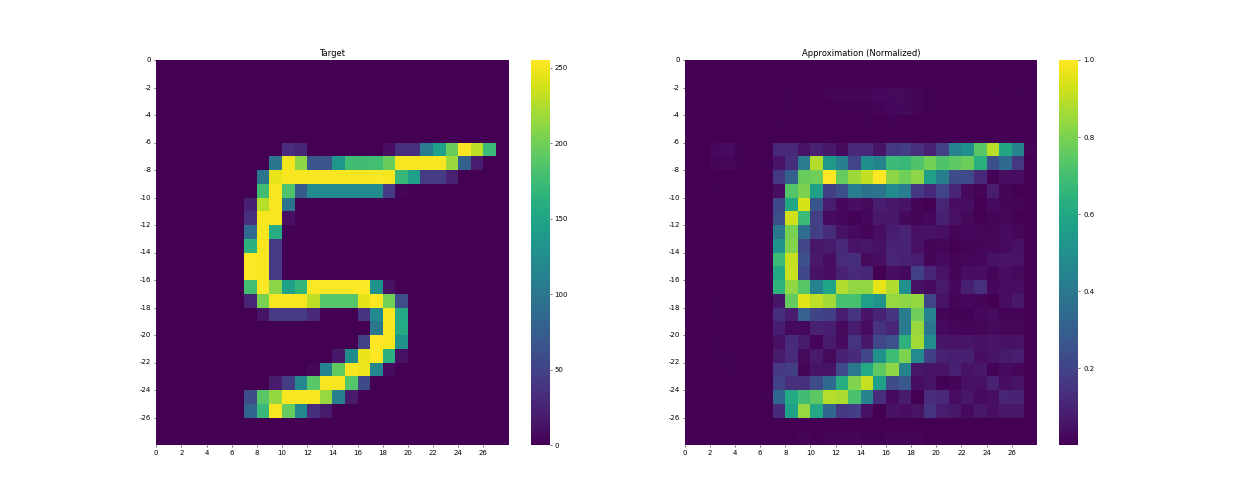

In [56]:
loss_cp = np.zeros((2, 60))
for i in trange(60):
    for j in range(2):
        nodes = 28
        target = train_X[i + 6413]
        input = {
                'nodes' : nodes,
                'padding' : 14 if j == 0 else 0,
                'n_rings': 1 if j == 0 else 2,
                #'length': 1 if j == 0 else j * 5,
                'target' : target,
                'orth_itr' : 3
                }
        pred, loss, output = jsi.jsi_backprop(input, EPOCHS=1e3)#3e-5)
        # print(pred)
        print(loss[-1])
        loss_cp[j][i] = min(loss)
        try:
            plt.close(fig)
            # plt.close(fig2)
        except:
            pass
        
        fig = jsi.pltCtst(target, output, 0, 0, nodes, nodes)
        # fig = plt.plot(range(loss.shape[0]), loss, label='loss')
        plt.savefig("./same_dim/mnist_" + str(i) + "_pad_" + str(pred['padding']) + "_nr_" + str(pred['n_rings']) + "-" + str(loss[-1]) + ".png")
        tf.keras.backend.clear_session()
        if pred.get('int', False):
            raise KeyboardInterrupt()

np.savez('./compare_same_dim.npz', loss_cp)

Text(0, 0.5, 'Loss')

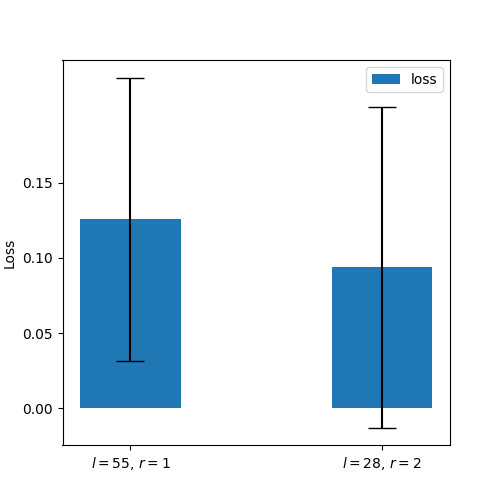

In [65]:
try:
    plt.close(fig3)
except:
    pass
fig3, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=100)
ax.bar(['$l=55$, $r=1$', '$l=28$, $r=2$'], np.average(loss_cp, axis=1), yerr=np.sqrt(np.var(loss_cp, axis=1))
            , label='loss', width=0.4, capsize=10)
ax.legend(loc='best')
# ax.set_xticks(np.array([1, 5, 10, 15, 20]))
ax.set_yticks(np.arange(0, 0.2, 0.05))
# ax.set_xlabel("Number of Modulation Lengths")
ax.set_ylabel("Loss")

In [13]:
with np.load('./length_1-9.npz') as data:
    loss_len = data['arr_0']

[[0.25701463 0.2686649  0.22649819 0.21490192 0.32222825 0.21838486
  0.23078638 0.16097122 0.36427289 0.55075347 0.39443958 0.12486011
  0.15865123 0.20986134 0.2426098  0.10786635 0.26959926 0.46022922
  0.44523031 0.33452618 0.31707841 0.39758146 0.25445193 0.05177325
  0.26661146 0.11890554 0.27272046 0.29385757 0.40999919 0.21308452
  0.509287   0.35072905 0.31010526 0.29022145 0.31267315 0.45701069
  0.34126031 0.34251684 0.60377932 0.2880103  0.31795025 0.15296054
  0.33554298 0.077815   0.39694434 0.09190375 0.36920249 0.13381821
  0.37838304 0.23740363 0.49361235 0.30441844 0.3091653  0.5735268
  0.25125986 0.55497557 0.34015352 0.16842163 0.49718034 0.36838901
  0.34169316 0.35633695 0.2910009  0.21086353 0.46571696 0.43554765
  0.34329611 0.14171046 0.43713295 0.25597608 0.33499563 0.15037441
  0.31903076 0.25565529 0.24970555 0.09704894 0.38078564 0.3613795
  0.32276374 0.26074272 0.45625079 0.34383553 0.51288414 0.62475103
  0.39163369 0.48634112 0.3248741  0.3431201  0.29

Text(0, 0.5, 'Loss')

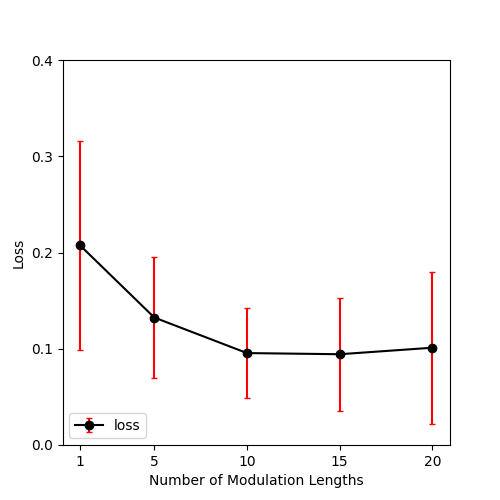

In [54]:
try:
    plt.close(fig3)
except:
    pass
fig3, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=100)
ax.errorbar(np.array([1, 5, 10, 15, 20]), np.average(loss_len, axis=1), np.sqrt(np.var(loss_len, axis=1))
            , label='loss', marker='o', ecolor='red', color='black', capsize=2.0)
ax.legend(loc='lower left')
ax.set_xticks(np.array([1, 5, 10, 15, 20]))
ax.set_yticks(np.arange(0, 0.5, 0.1))
ax.set_xlabel("Number of Modulation Lengths")
ax.set_ylabel("Loss")

In [47]:
with np.load('./r_1-5.npz') as data:
    loss_r = data['arr_0']


Text(0, 0.5, 'Loss')

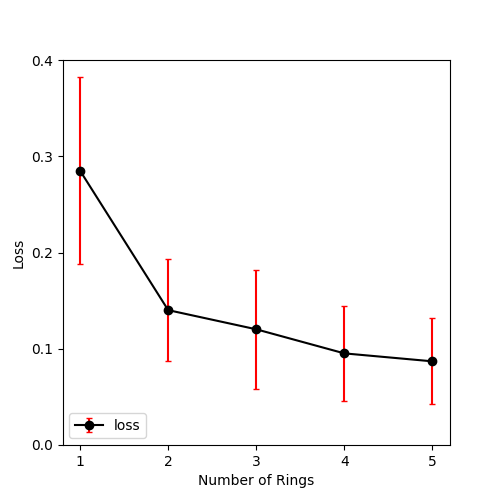

In [50]:
try:
    plt.close(fig4)
except:
    pass
fig4, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=100)
ax.errorbar(np.array(range(loss_r.shape[0]))+1, np.average(loss_r, axis=1), np.sqrt(np.var(loss_r, axis=1))
            , label='loss', marker='o', ecolor='red', color='black', capsize=2.0)
ax.legend(loc='lower left')
ax.set_xticks(np.arange(1, 6))
ax.set_yticks(np.arange(0, 0.5, 0.1))
ax.set_xlabel("Number of Rings")
ax.set_ylabel("Loss")

In [66]:
print(np.average(loss_r, axis=1))

[0.28490765 0.1401341  0.12021023 0.09519594 0.08693435]


  0%|          | 0/100 [00:00<?, ?it/s]

iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.24547714


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0732587


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16759187


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06182885


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07148063


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.27225667


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14548826


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08207399


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.103037655


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.095354676


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3349133


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11398548


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12788081


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.067329764


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06728327


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15535337


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08204216


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06647271


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08655816


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.061755657


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.23005736


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14503157


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15770048


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.088710845


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08020091


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.23968047


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.122711


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.068124354


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.058499336


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07174784


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17374617


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.058977604


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.072862685


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.032621443


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.045328736


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2001527


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12115896


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06184119


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07471579


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.061772943


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.5130619


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15173846


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.112318695


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10858476


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13144726


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.41092342


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18802208


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2010516


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.068627656


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.079740524


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.33076543


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.20166409


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14232802


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14447516


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1382069


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.22885615


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2212593


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06321591


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.03208202


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.058592916


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16124976


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10649288


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09264952


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07339674


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07185781


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2446155


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10404086


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.060679853


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.037504256


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.025883317


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.22347802


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18292165


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18053126


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08160102


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08079368


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17335802


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.062010586


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.047476828


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.028772414


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.026572704


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.27249312


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15585923


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16376036


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11597049


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12340391


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.43314534


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16142035


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11972761


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10082954


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13025284


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.20116282


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10223442


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.060624182


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.055844545


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.04174155


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.31207943


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19863492


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.22430629


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15442276


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08698571


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.32451808


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.124507725


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10568762


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07624096


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07753247


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3820154


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15777677


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18363965


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08053756


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07908261


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.23377442


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08426845


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06943911


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.055759728


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.043658137


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.040421188


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.008080184


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0049746633


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.008179307


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0036179423


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.25777733


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09640044


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09038234


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0697481


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.082295895


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18883812


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10729331


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.058873117


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.049164176


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.032854795


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.27380955


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12823814


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.085318625


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07958591


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09938979


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.26712388


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.096702814


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11805594


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.053935587


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.04938084


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.42997968


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17902607


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13489479


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15611726


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14355618


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2162137


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.120182276


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10920048


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07806021


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06026143


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.56558937


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.25904042


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16550016


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16346496


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1237663


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3543017


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1621784


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18873572


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.096857905


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11544603


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.29819793


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18055493


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11923516


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14521015


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16514838


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3270914


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.20446485


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19706792


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10632354


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16118407


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.37396026


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14260244


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12663597


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15645689


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13720751


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.44842273


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.21341443


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.22143239


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.21260709


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1568132


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.32319522


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17867404


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19382071


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14932072


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1279093


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.42687064


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2164349


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18640721


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15311623


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07739818


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.34229898


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12102163


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07443279


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2601326


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06480569


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3729338


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17271239


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13336205


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10588193


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.090696216


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2994821


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14225966


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12072265


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0753777


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0655458


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17384964


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07448679


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07803297


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.052796245


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.048843443


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3778643


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10013735


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07701105


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.088650286


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06242609


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.103841305


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.050842583


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.022435427


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.025027514


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.024721801


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.35840088


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.20644534


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13067698


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13785052


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.104876995


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.084665716


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.03180951


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.022452056


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.007647872


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.004743159


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3350312


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.119118094


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11117858


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08904976


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07451564


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19354445


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.091686904


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.039784968


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.029093444


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.01851362


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.40452677


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19675463


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.33473963


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16371906


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1870259


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2623664


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17803586


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15283906


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13707131


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1573407


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.41248327


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.24923503


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17189586


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.16133982


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15268683


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.21030527


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.094103515


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.059788287


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.056278586


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.06144297


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.36838657


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18263352


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.25384712


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1802699


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17806089


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.40374637


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19893527


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14615071


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12776929


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07475114


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.27284038


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12217009


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11091626


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.090970695


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0791378


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3638522


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19913566


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15684932


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.13930768


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.094081104


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.2898301


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.21770555


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14362293


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12620795


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17070001


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18784648


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.12705988


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.09149581


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.096200645


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.061795473


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.32534802


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18787515


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.0804764


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.116827965


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.11130035


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.30353796


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18535429


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.19504339


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.1322816


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.14739585


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.33411306


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.15340263


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.17232627


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.08435911


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.07886714


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.3086211


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.18847066


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

2024-04-24 20:24:44.523674: E tensorflow/compiler/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference__update_step_xla_6308131__.57] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-04-24 20:26:29.015394: E tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 3m44.604651903s

********************************
[Compiling module a_inference__update_step_xla_6308131__.57] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


Interrupted. Progress is saved in chkpt/
0.0


KeyboardInterrupt: 

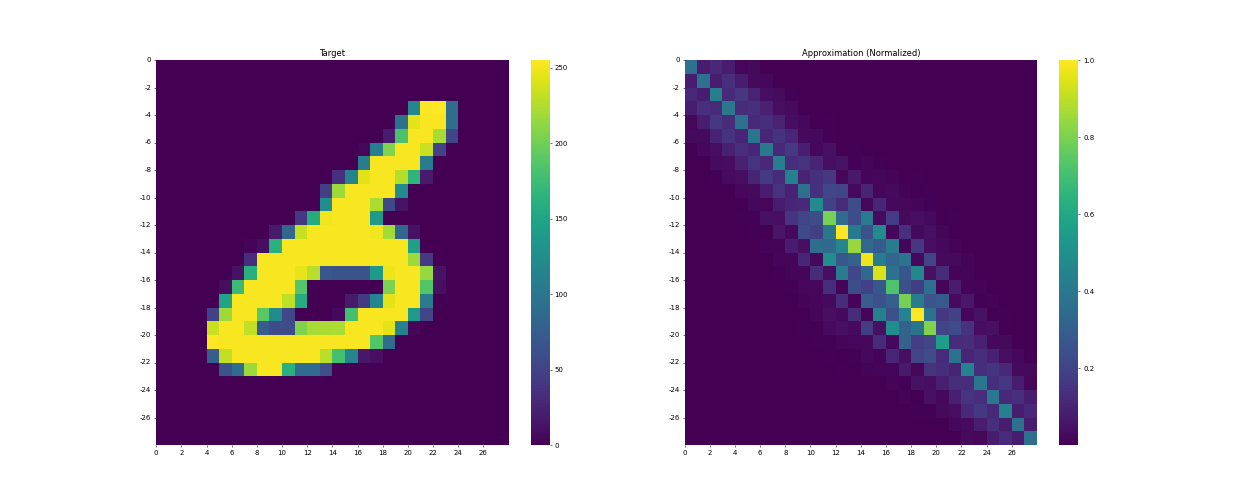

In [12]:
loss_r = np.zeros((5, 100))
rand = int(np.floor(np.random.uniform(0, 9000)))

for i in trange(100):
    for j in range(5):
        nodes = 28
        target = train_X[i + 6413]
        input = {
                'nodes' : nodes,
                'padding' : 2,
                'n_rings': j + 1,
                'length': 2,
                'target' : target,
                'orth_itr' : 3
                }
        pred, loss, output = jsi.jsi_backprop(input, EPOCHS=1e3)#3e-5)
        # print(pred)
        print(loss[-1])
        loss_r[j][i] = min(loss)
        try:
            plt.close(fig)
            plt.close(fig4)
        except:
            pass
        
        fig = jsi.pltCtst(target, output, 0, 0, nodes, nodes)
        plt.savefig("./test/mnist_" + str(i) + "_pad_" + str(pred['padding']) + "_nr_" + str(pred['n_rings']) + "_l_" + str(pred['length']) + "-" + str(loss[-1]) + ".png")
        tf.keras.backend.clear_session()
        if pred.get('int', False):
            raise KeyboardInterrupt()

fig4, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=50)
ax.plot(range(loss_r.shape[0]), np.average(loss_r, axis=1), label='loss')
ax.legend(loc='best')
ax.grid()

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


iterations:   0%|          | 0/10000 [00:00<?, ?it/s]

0.2280882


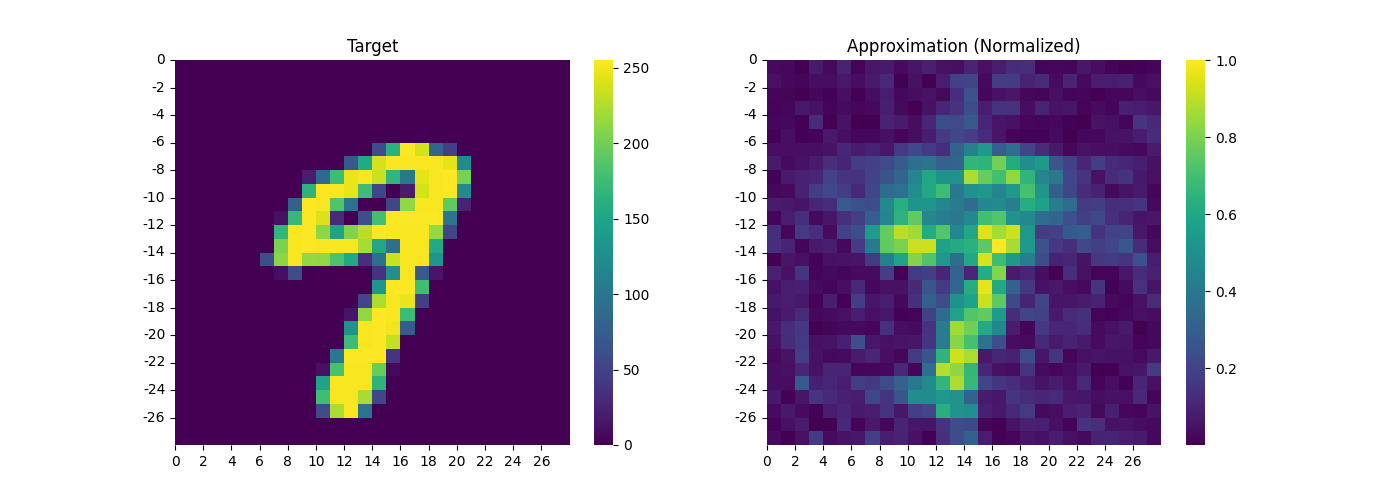

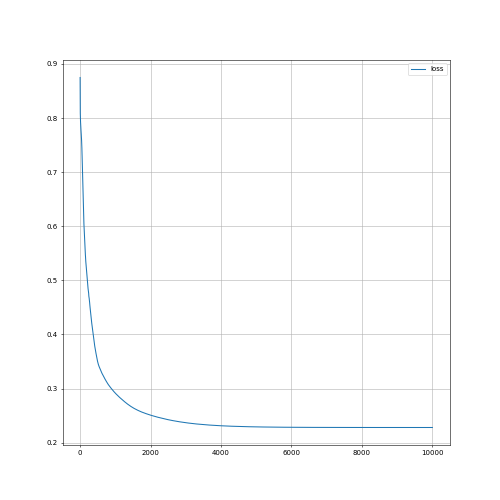

In [34]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train shape:', train_X.shape)
print('Y_train shape:', train_y.shape)
print('X_test shape:', test_X.shape)
print('Y_test shape:', test_y.shape)

nodes = 28
target = test_X[7118]
# with np.load('./uniform.npz') as data:
#     target = data['arr_0'][0]
input = {
        'nodes' : nodes,
        'npass' : 1,
        'npump': 40,
        'mlength': 20,
        'nbessel': 8, 
        'target' : target,
        }
pred, loss, output = jsi.jsi_backprop(input, EPOCHS=1e4)#3e-5)
# print(pred)
print(loss[-1])

try:
    plt.close(fig)
    plt.close(fig2)
except:
    pass
# print(output)
fig = jsi.pltCtst(target, output, 0, 0, nodes, nodes)
# plt.savefig("./test/mnist_" + str(i) + "_pad_" + str(pred['padding']) + "_nr_" + str(pred['n_rings']) + "_l_" + str(pred['length']) + "-" + str(loss[-1]) + ".png")
fig2, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=50)
ax.plot(range(len(loss)), loss, label='loss')
ax.legend(loc='best')
ax.grid()
if pred.get('int', False):
    raise KeyboardInterrupt()

iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

0.10545868


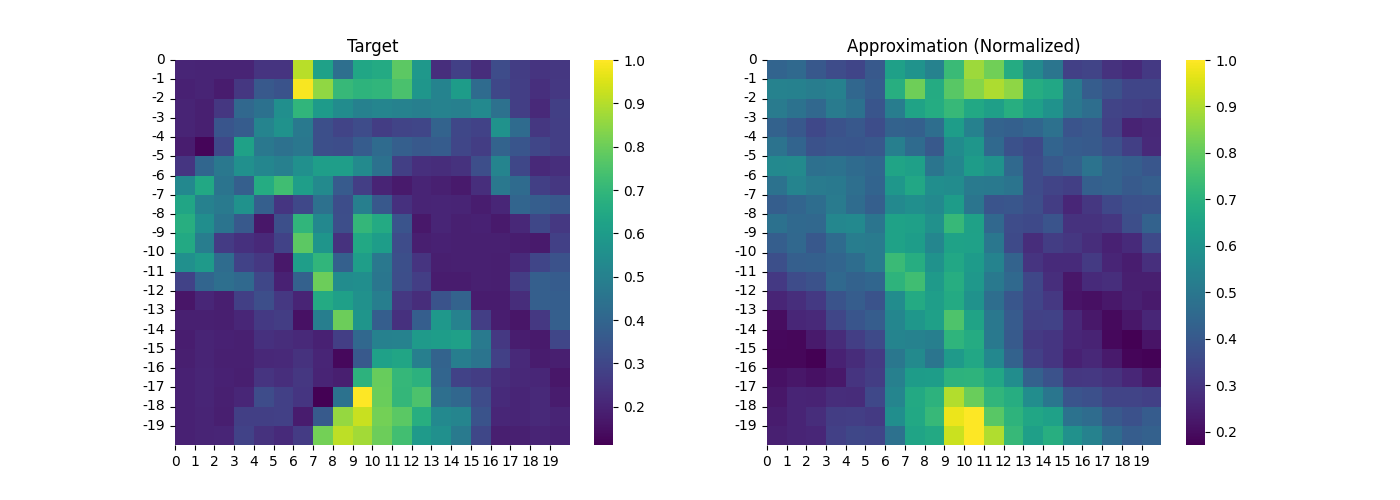

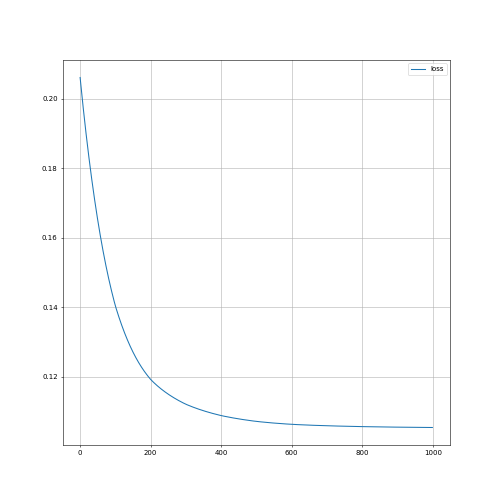

In [12]:
nodes = 20
npump = 200
width = 200

target = np.array(ImageOps.grayscale(Image.open('./ref.png').resize((nodes, nodes), resample=Image.LANCZOS)))
target = target / np.max(target)

# print(target)
input = {
        'nodes' : nodes,
        'npass' : 1,
        'npump': npump,
        'width': width, 
        'mlength': 1,
        'nbessel': 8, 
        'target' : target,
        "strides": 1
        }
pred, loss, output = jsi.jsi_backprop(input, EPOCHS=1e3)#3e-5)
# print(pred)
print(loss[-1])

try:
    plt.close(fig)
    plt.close(fig2)
except:
    pass
# print(output)
fig = jsi.pltCtst(target, output, 0, 0, nodes, nodes)
# plt.savefig("./test/mnist_" + str(i) + "_pad_" + str(pred['padding']) + "_nr_" + str(pred['n_rings']) + "_l_" + str(pred['length']) + "-" + str(loss[-1]) + ".png")
fig2, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=50)
ax.plot(range(len(loss)), loss, label='loss')
ax.legend(loc='best')
ax.grid()
if pred.get('int', False):
    raise KeyboardInterrupt()

nan


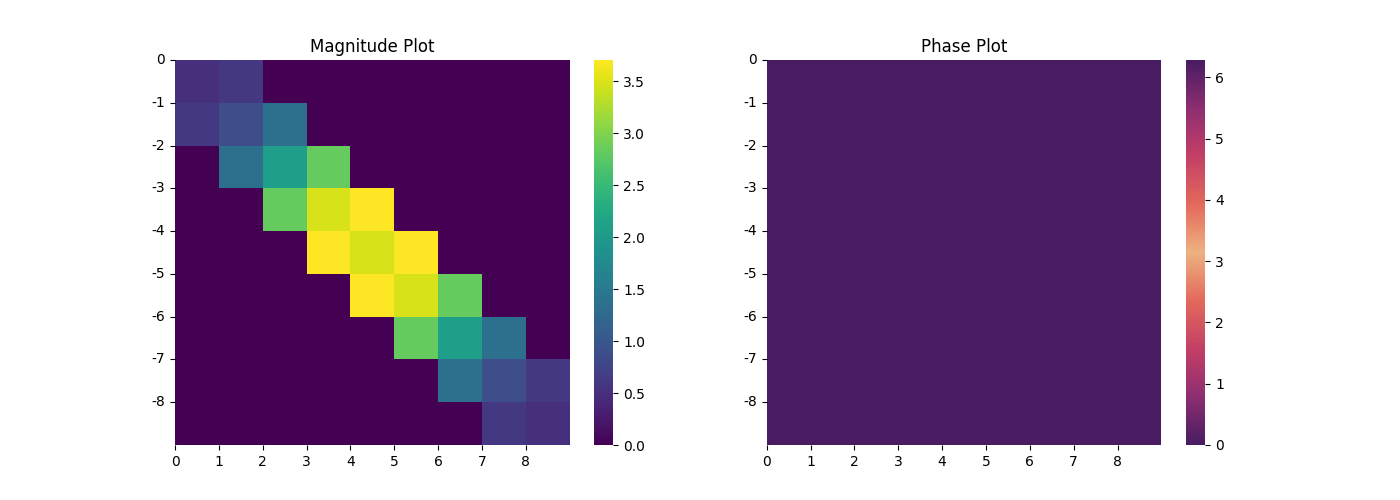

In [37]:
nodes = 9
mlength = 50
npump = 3
width = 20
npass = 1
nodes_t = nodes + npass * 2 * mlength

@tf.function
def bw(x):
    return (tf.experimental.numpy.sinc(tf.where(tf.math.less(x, 0), x, 0) * 0.2 + 0.2) +
            tf.experimental.numpy.sinc(tf.where(tf.math.greater_equal(x, 0), x, 0) * 0.2 - 0.2) )

input = {
        'nodes' : nodes,
        'npass' : npass,
        'npump': npump,
        'width': width, 
        'mlength': mlength,
        'nbessel': 8, 
        'pump': np.ones((npump, ), dtype=np.complex64), 
        'ps': np.ones((npass, 2, nodes_t), dtype=np.complex64), 
        'eom': np.array([[0.0 * np.pi, 0.0]], dtype=np.complex64), 
        'bw': bw
        }
pred, loss, output = jsi.jsi_backprop(input, train=False)#3e-5)
# print(pred)
print(loss[-1])

try:
    plt.close(fig)
except:
    pass
# print(output)
fig = jsi.pltSect(output, 0, 0, nodes, nodes)

if pred.get('int', False):
    raise KeyboardInterrupt()

In [39]:
print(pred['eom'])

[[0.+0.j 0.+0.j]]


  0%|          | 0/451 [00:00<?, ?it/s]

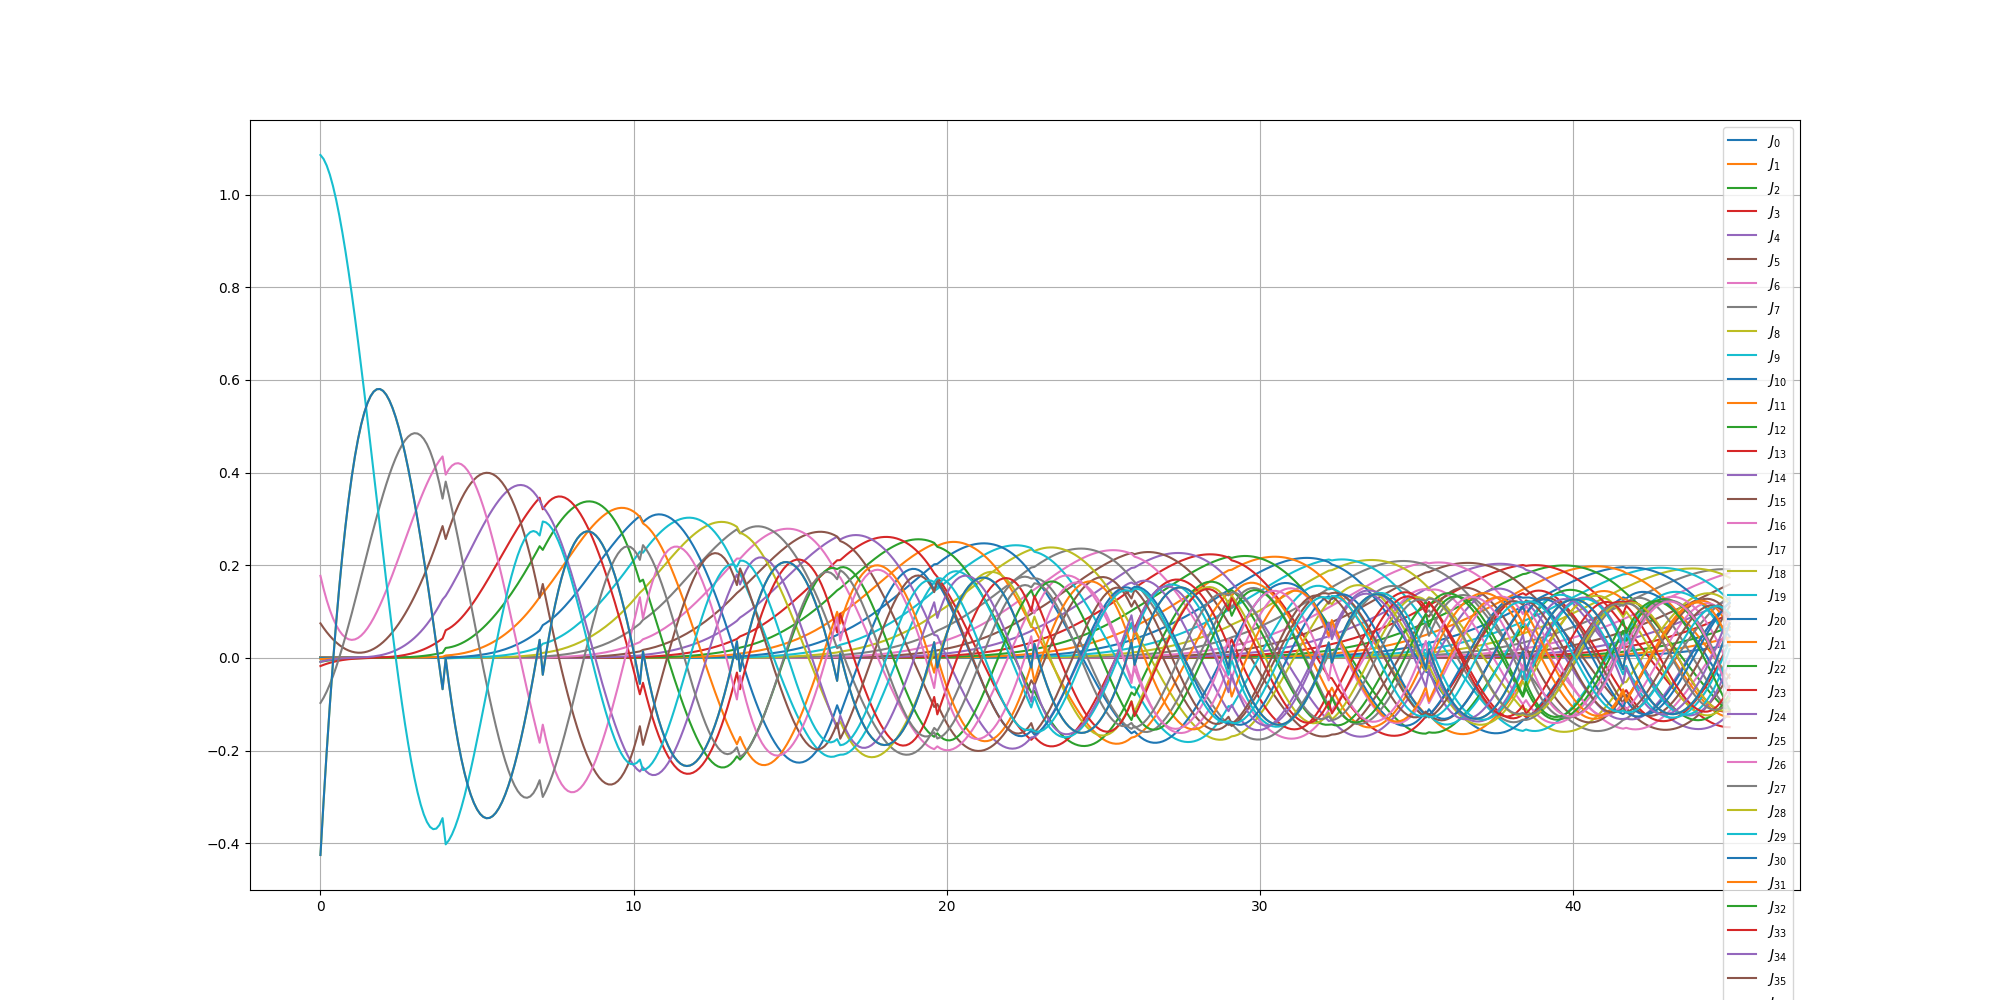

In [6]:
kernel = jsi.JsiKernel(1, 1, 1, 50, 3)
arr = []
samples = np.linspace(0, 45, 451, dtype=np.float32)
for i in tqdm(samples):
    arr.append(kernel.eom2Bessel(i).numpy())
arr = np.array(arr).transpose()

try:
    plt.close(fig)
except:
    pass

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), dpi=100)
for i in range(51):
    ax.plot(samples, arr[i], label='$J_{'+str(i)+"}$")
ax.legend(loc='best')
ax.grid()

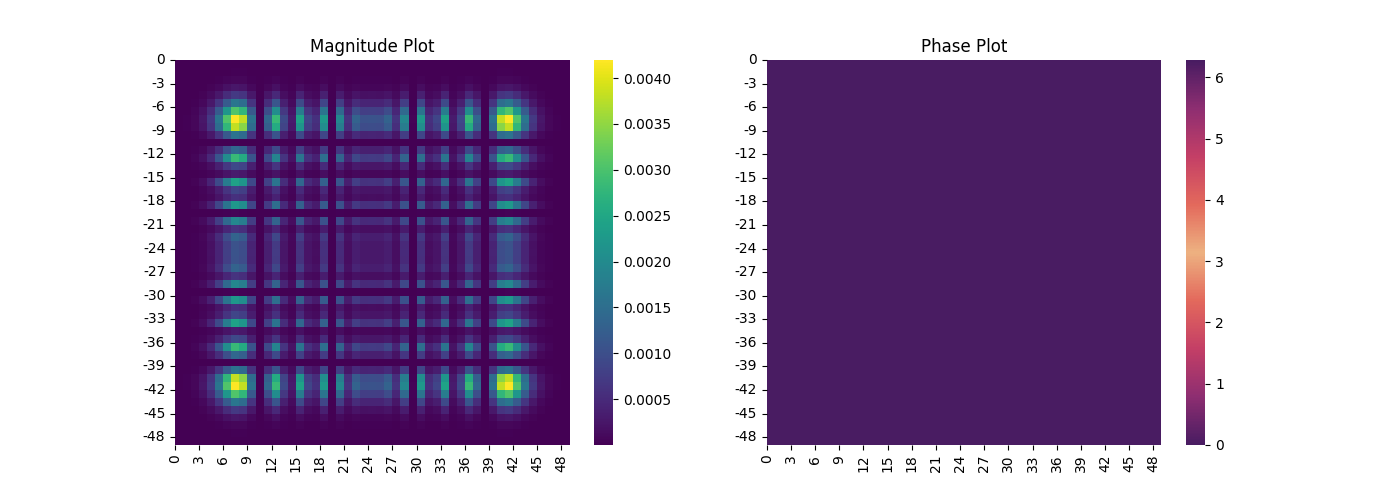

In [37]:
nodes = 49
width = 1
npass = 1
npump = 1
kernel = jsi.JsiKernel(nodes, npump=npump, width=width, npass=npass, mlength=50, nbessel=8)
output = kernel(
    np.ones((npump, ), dtype=np.complex64), 
    np.ones((1, 2, nodes + 2 * 50 * npass), dtype=np.complex64), 
    np.ones((1, 2), dtype=np.float32) * 6 * np.pi
)

try:
    plt.close(fig)
except:
    pass
# print(output)
fig = jsi.pltSect(output, 0, 0, nodes, nodes)

In [41]:
arr = []
for i in tqdm(np.linspace(0, 45, 451, dtype=np.float32)):
    nodes = 49
    width = 1
    npass = 1
    npump = 1
    kernel = jsi.JsiKernel(nodes, npump=npump, width=width, npass=npass, mlength=50, nbessel=8)
    output = kernel(
        np.ones((npump, ), dtype=np.complex64), 
        np.ones((1, 2, nodes + 2 * 50 * npass), dtype=np.complex64), 
        np.ones((1, 2), dtype=np.float32) * i
    )
    temp = []
    for j in range(nodes):
        temp.append(output[nodes - 1 - j][j])
    arr.append(temp)


  0%|          | 0/451 [00:00<?, ?it/s]

/home/w41g87/miniconda3/envs/tf/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


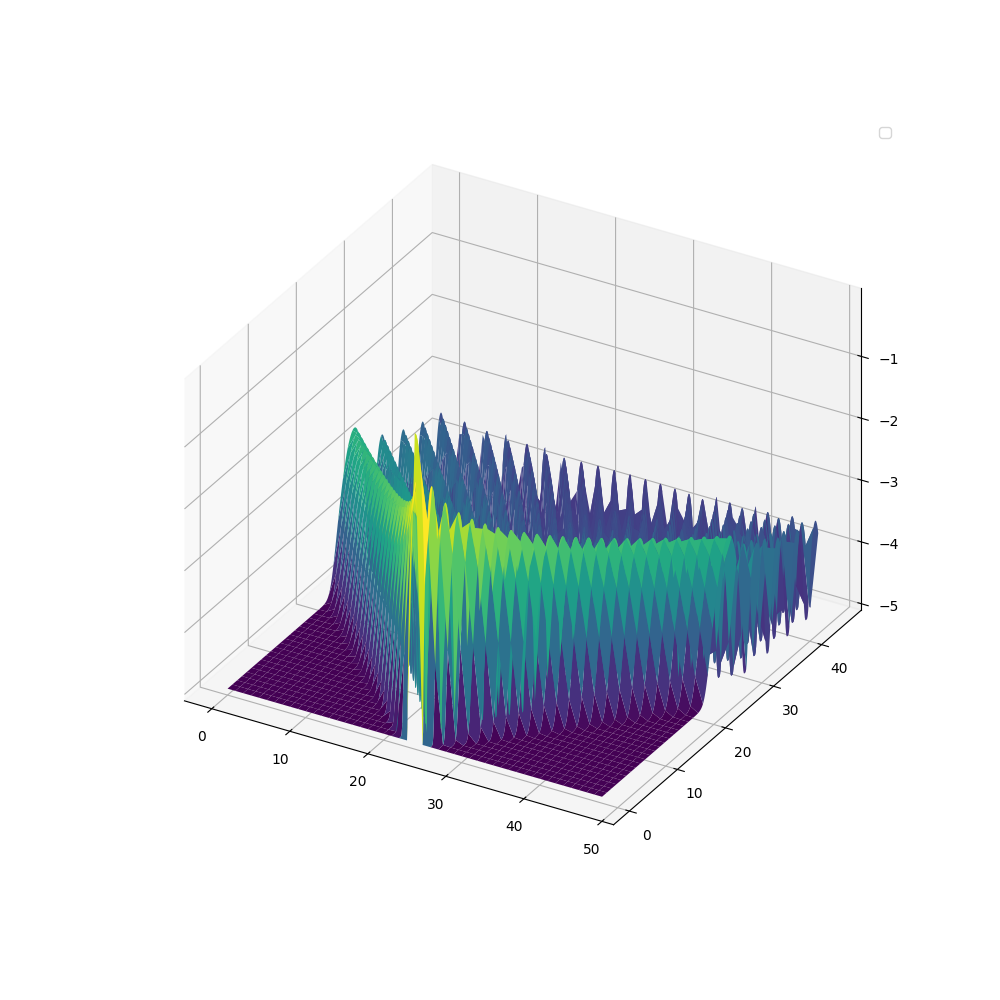

In [75]:
try:
    plt.close(fig)
except:
    pass
X, Y = np.meshgrid(range(49), np.linspace(0, 45, 451))
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(projection='3d')
ax.set_proj_type('ortho')
ax.plot_surface(X, Y, np.log10(np.array(arr)+0.00001), rstride = 10, cstride = 1, cmap = "viridis")
ax.legend(loc='best')
ax.grid()